In [1]:
#Importing Libraries 
import matplotlib.pyplot as plt
import pyodbc
import pandas as pd
import seaborn as sns

# Connection string to import data from SQL
cnxn_str = ("Driver={SQL Server};"
            "Server=LAPTOP-MS0H2O3U\SQLEXPRESS01;"
            "Database=SQLPortfolioProject1;"
            "Trusted_Connection=yes;")

# Establishing the connection with SQL Database
cnxn = pyodbc.connect(cnxn_str)

###### We want to explore some of the factors that could affect death caused by COVID - 19. 
###### We first delve into Vaccinations. Here, we will be exploring the relationship between vaccinated population of a country and and number of deaths

In [2]:
# Query to get data from the SQL Database

# In this query, a 14-day lag is applied to the vaccinated population column because:
# 1. It takes 14 days post vaccination to develop immunity against the virus.
# 2. Deaths occuring before that cannot be associated to lack of protection from vaccine.

query = """
SELECT 
    d.date, 
    d.location, 
    cardiovasc_death_rate,diabetes_prevalence, 
    life_expectancy,
    human_development_index hdi,
    population_density, 
    CAST(new_deaths AS INT) new_deaths,LAG(CAST(people_vaccinated AS INT),14) OVER( PARTITION BY d.location ORDER BY d.date)people_partially_vaccinated,
    stringency_index 
    
FROM 
    CovidDeaths d  
    
JOIN
    CovidVaccinations v 
    
ON 
    d.date = v.date AND d.location = v.location 
WHERE 
    d.continent IS NOT null 
AND 
    d.location IN ('United States', 'United Kingdom', 'India', 'Mexico', 'Israel', 'Russia', 'Japan', 'South Africa')"""


raw_data = pd.read_sql(query, cnxn)

raw_data

<ipython-input-2-c41ffb75f449>:32: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  raw_data = pd.read_sql(query, cnxn)


,date,location,cardiovasc_death_rate,diabetes_prevalence,life_expectancy,hdi,population_density,new_deaths,people_partially_vaccinated,stringency_index
0,2020-01-30,India,282.280,10.39,69.66,0.645,450.419,NaN,NaN,10.19
1,2020-01-31,India,282.280,10.39,69.66,0.645,450.419,NaN,NaN,10.19
2,2020-02-01,India,282.280,10.39,69.66,0.645,450.419,NaN,NaN,10.19
3,2020-02-02,India,282.280,10.39,69.66,0.645,450.419,NaN,NaN,10.19
4,2020-02-03,India,282.280,10.39,69.66,0.645,450.419,NaN,NaN,10.19
...,...,...,...,...,...,...,...,...,...,...
3665,2021-04-26,United States,151.089,10.79,78.86,0.926,35.608,474.0,120848490.0,NaN
3666,2021-04-27,United States,151.089,10.79,78.86,0.926,35.608,641.0,122295530.0,NaN
3667,2021-04-28,United States,151.089,10.79,78.86,0.926,35.608,959.0,123917385.0,NaN
3668,2021-04-29,United States,151.089,10.79,78.86,0.926,35.608,854.0,125822868.0,NaN


In [3]:
# Overview of the Dataset
raw_data.info()
raw_data.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3670 entries, 0 to 3669
Data columns (total 10 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   date                         3670 non-null   datetime64[ns]
 1   location                     3670 non-null   object        
 2   cardiovasc_death_rate        3670 non-null   float64       
 3   diabetes_prevalence          3670 non-null   float64       
 4   life_expectancy              3670 non-null   float64       
 5   hdi                          3670 non-null   float64       
 6   population_density           3670 non-null   float64       
 7   new_deaths                   3330 non-null   float64       
 8   people_partially_vaccinated  632 non-null    float64       
 9   stringency_index             3614 non-null   float64       
dtypes: datetime64[ns](1), float64(8), object(1)
memory usage: 286.8+ KB


,date,cardiovasc_death_rate,diabetes_prevalence,life_expectancy,hdi,population_density,new_deaths,people_partially_vaccinated,stringency_index
count,3670,3670.000000,3670.00000,3670.000000,3670.000000,3670.000000,3330.000000,6.320000e+02,3614.000000
mean,2020-09-12 22:15:14.223433472,188.948768,7.89085,76.152441,0.831347,202.016702,393.988288,1.708236e+07,58.304566
min,2020-01-01 00:00:00,79.370000,4.28000,64.130000,0.645000,8.823000,0.000000,0.000000e+00,0.000000
25%,2020-05-21 06:00:00,122.137000,5.72000,72.580000,0.779000,35.608000,20.000000,1.092870e+06,44.910000
50%,2020-09-13 00:00:00,152.783000,6.74000,75.050000,0.824000,66.444000,139.000000,5.229362e+06,65.740000
75%,2021-01-06 00:00:00,200.380000,10.79000,81.320000,0.926000,347.778000,528.750000,2.137807e+07,73.610000
max,2021-04-30 00:00:00,431.297000,13.06000,84.630000,0.932000,450.419000,4474.000000,1.277431e+08,100.000000
std,NaN,109.173033,2.96805,6.600409,0.103962,171.222767,607.567016,2.653580e+07,22.668820


###### We can use correlation to understand the type of relationship and its strength between new_deaths and people_partially_vaccinated.

###### For a valid correlation, the number of data points need to exceed 30. Let's first ensure this condition is met before any further calculation

In [4]:
# Count of data points for each location
raw_data.groupby('location').count()

,date,cardiovasc_death_rate,diabetes_prevalence,life_expectancy,hdi,population_density,new_deaths,people_partially_vaccinated,stringency_index
location,,,,,,,,,
India,457,457,457,457,457,457,416,91,457
Israel,436,436,436,436,436,436,407,119,429
Japan,465,465,465,465,465,465,443,41,461
Mexico,486,486,486,486,486,486,408,96,480
Russia,456,456,456,456,456,456,408,38,452
South Africa,449,449,449,449,449,449,400,46,424
United Kingdom,456,456,456,456,456,456,421,98,456
United States,465,465,465,465,465,465,427,103,455


###### Since we have more than 30 data points for each location, we can now explore the relationship between new_deaths and people_partially_vaccinated	

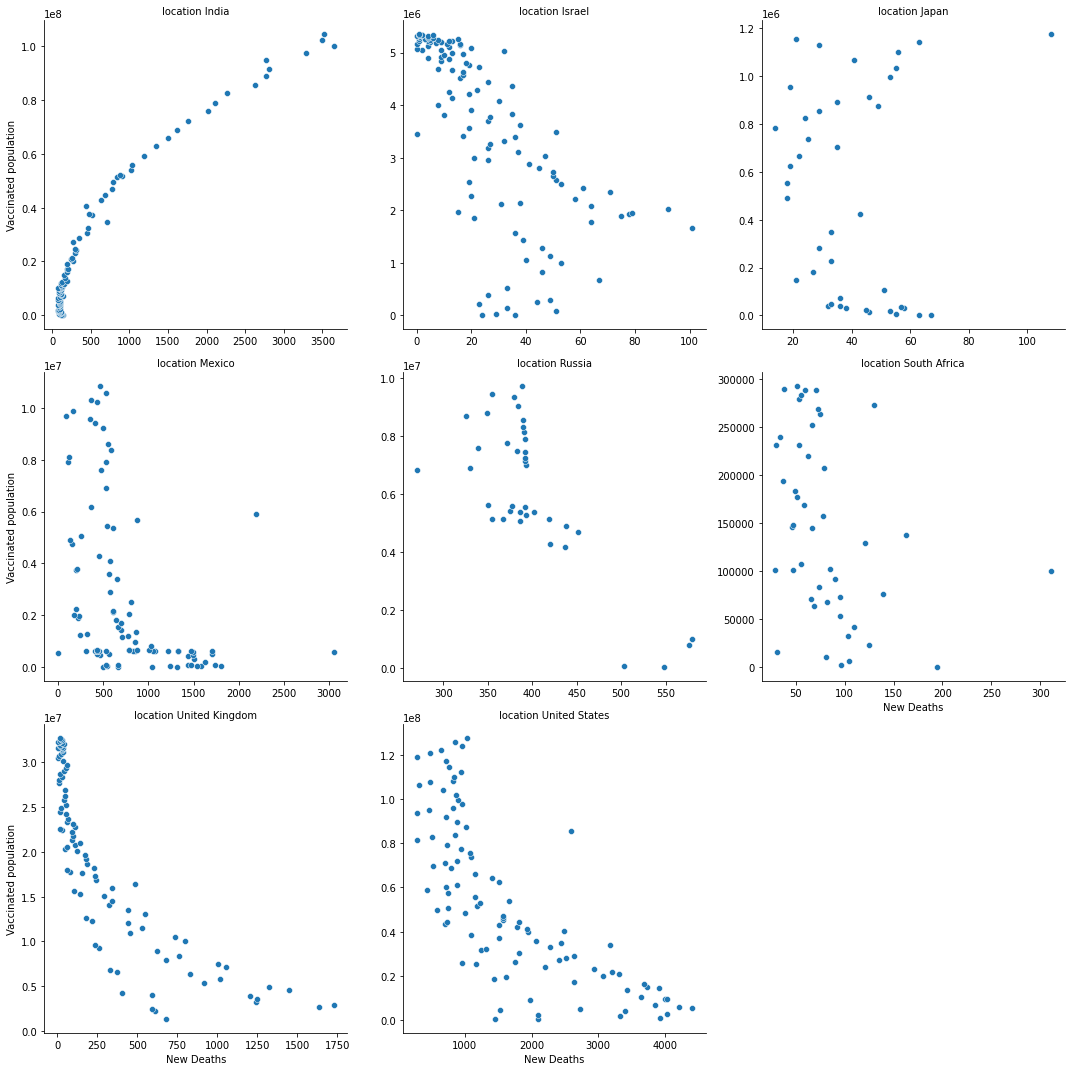

In [5]:
# Creating a FacetGrid for the scatter plots

grid = sns.FacetGrid(raw_data, col='location', col_wrap = 3, height=5, aspect=1, sharex=False, sharey=False, margin_titles= True)
grid.map(sns.scatterplot,'new_deaths','people_partially_vaccinated')
grid.set_axis_labels('New Deaths', 'Vaccinated population')
grid.set_titles(col_template='location {col_name}')
plt.show()

In [6]:
# Removing outliers from the data

# Japan
raw_data[(raw_data['location'] == 'Japan')& (raw_data['new_deaths'] > 100)]
raw_data.drop(1356, inplace = True)

# Mexico
raw_data[(raw_data['location'] == 'Mexico')& (raw_data['new_deaths'] > 2000)]
raw_data.drop([1759,1823], inplace = True)

# South Africa
raw_data[(raw_data['location'] == 'South Africa')& (raw_data['new_deaths'] > 300)]
raw_data.drop(2706, inplace = True)

#United States
raw_data[(raw_data['location'] == 'United States') & (raw_data['new_deaths'] > 2000) & (raw_data['people_partially_vaccinated'] > 80000000)]
raw_data.drop(3646, inplace = True)

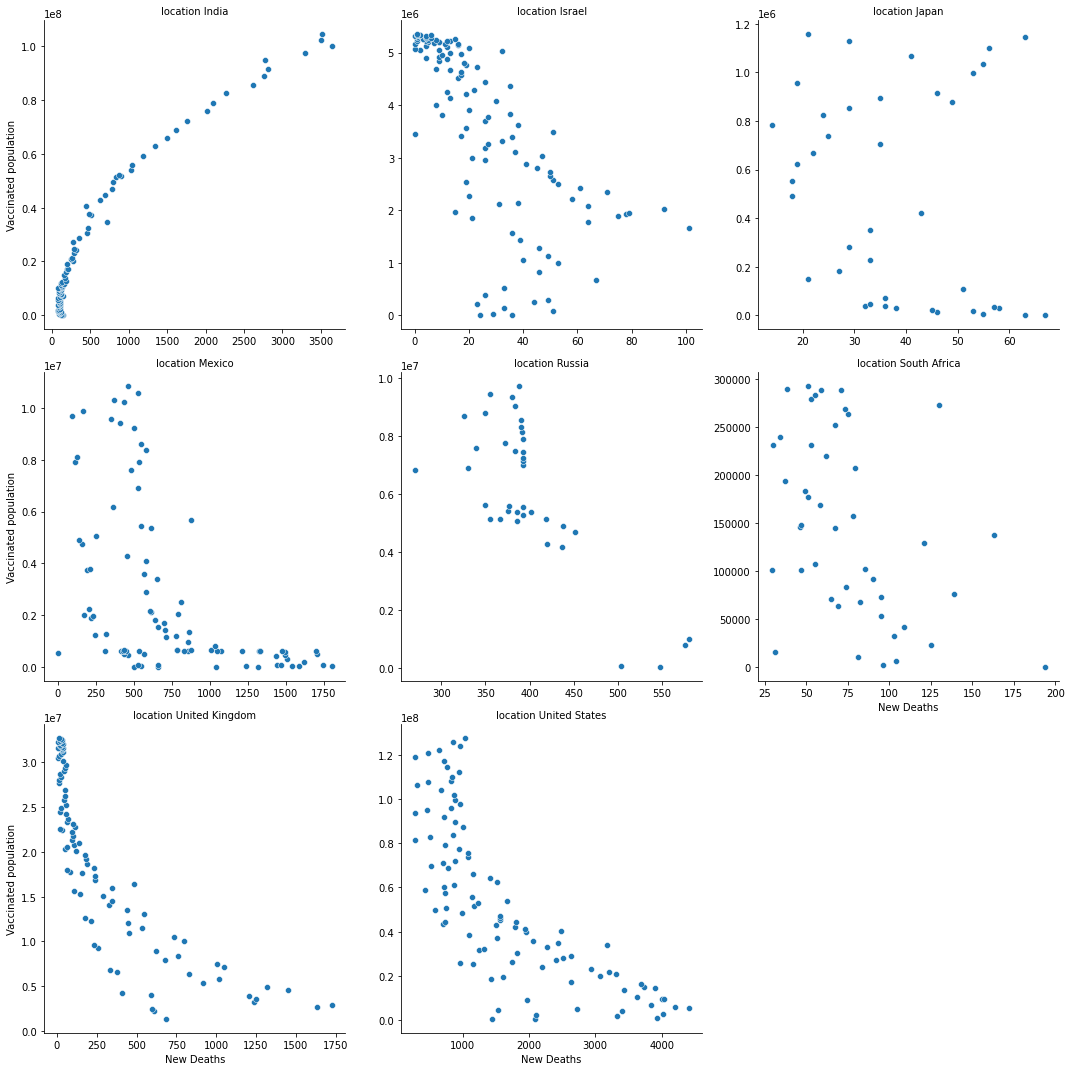

In [7]:
# Scatterplots without the outliers
grid = sns.FacetGrid(raw_data, col='location', col_wrap = 3, height=5, aspect=1, sharex=False, sharey=False, margin_titles= True)
grid.map(sns.scatterplot,'new_deaths','people_partially_vaccinated')
grid.set_axis_labels('New Deaths', 'Vaccinated population')
grid.set_titles(col_template='location {col_name}')
plt.show()

###### Each of these scatterplots show some trend between vaccinated population and new deaths. Lets calculate the correlation to ennumerate the same

In [8]:
# Calculating correlation
correlation_df = pd.DataFrame(raw_data.groupby('location').apply(lambda x : x['new_deaths'].corr(x['people_partially_vaccinated'])), columns = ['correlation'])
correlation_df

,correlation
location,
India,0.953171
Israel,-0.708651
Japan,-0.209788
Mexico,-0.503727
Russia,-0.768831
South Africa,-0.427189
United Kingdom,-0.812699
United States,-0.760014


###### Right off the bat, we notice, apart from India every other country shows inverse correlation. We can further enrich the analysis by adding supplementary data to understand how other factors could influence number of deaths.

In [10]:
# Adding additional data to supplement the analysis 

suppl_data =  raw_data.groupby('location').mean().merge(correlation_df, how = 'inner', left_index=True, right_index=True)

# Removing irrelevant columns
suppl_data.drop(['date','new_deaths','people_partially_vaccinated'], axis = 1).sort_values('correlation')

,cardiovasc_death_rate,diabetes_prevalence,life_expectancy,hdi,population_density,stringency_index,correlation
location,,,,,,,
United Kingdom,122.137,4.28,81.32,0.932,272.898,66.487193,-0.812699
Russia,431.297,6.18,72.58,0.824,8.823,51.607743,-0.768831
United States,151.089,10.79,78.86,0.926,35.608,61.115110,-0.760014
Israel,93.320,6.74,82.97,0.919,402.606,65.946364,-0.708651
Mexico,152.783,13.06,75.05,0.779,66.444,57.640879,-0.503727
South Africa,200.380,5.52,64.13,0.709,46.754,58.646383,-0.427189
Japan,79.370,5.72,84.63,0.919,347.778,37.605401,-0.209788
India,282.280,10.39,69.66,0.645,450.419,68.075864,0.953171


Almost all countries show an inverse correlation i.e. with an increase in vaccinated population there is a decrease in new deaths.

The only country showing a direct relationship is India. It shows quite a strong positive correlation at 0.95. A glance at the supplementary data shows that it fares poorly where all general health indicators are concerned. This indicates higher chances of falling sick due to to low immunity and/or lack of proper health infrastructure or access to the same. Besides, with a high population density of 450 people per unit area, spread of the virus cannot be easily contained, leading to faster spread and a burden on the healthcare infrastructure leading to lesser care provided for those in need. These factors could influence the number of deaths. Overall, although with an increase in vaccinations there is an increase in deaths, a correlation co-efficient does not determine causality. It would be incorrect to conclude that vaccinations cause death solely based on correlation. Instead there is a possibility that the vaccinations would have decreased the absolute number of deaths which would have otherwise occured in the absense of a vaccine.

The remaining countries show varying levels of inverse relationships. 
Japan shows a weak inverse relatinship. With a high HDI and well performing health indicators, overall health of the general population seems good with an established healthcare system. However population density is quite high at 348 people per unit area which definitely contributes to increase in spread. Beside unlike the other High HDI coutries, the average stringency index is low in Japan. Lack of stringent goverment policies and high population density could mean unchecked  spread of virus burdening the healthcare instituitions and increasing death

South Africa and Mexico, the 2 moderate HDI countries, show a moderate correlation. Although they have poor health indicators the low population density may have contained the spread leading to lesser deaths

The remaining countries, which belong to higher HDI groups, show a strong inverse correlation. Whilst Israel and UK show better health indicators, population density is much higher in these countries. Meanwhile the US and Russia show relatively poor health indicators but the spread seems to be contained with the low population density.

In [11]:
suppl_data.drop(['date','new_deaths','people_partially_vaccinated'], axis = 1).sort_values('correlation').to_csv(r'C:\Users\chels\ALex beginner\SQL Scripts\vaccination.csv')